In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import VGG16
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [12]:
# Load the dataset
dataset_path = r"C:\Human Action Recognition\train" 
train_file = r"C:\Human Action Recognition\Training_set.csv" # not using the test csv because it does not contains labels

In [13]:
# Read the train file
train_df = pd.read_csv(train_file, sep=',', header=None, names=['filename', 'label'])


In [14]:
# separating the train data into two parts training and testing
train_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)
test_df

,filename,label
4058,Image_4058.jpg,hugging
1399,Image_1399.jpg,eating
2034,Image_2034.jpg,sitting
3528,Image_3528.jpg,listening_to_music
7383,Image_7383.jpg,hugging
...,...,...
8057,Image_8057.jpg,cycling
12163,Image_12163.jpg,sitting
2108,Image_2108.jpg,hugging
4100,Image_4100.jpg,running


In [15]:
# Preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255) 

batch_size=32
img_height = 224
img_width = 224
classes = ["sitting","using laptop","hugging",
           "sleeping","drinking","clapping","dancing",
           "cycling","calling","laughing","eating","fighting",
           "listening_to_music","running","texting"
          ]


train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=dataset_path,
    x_col='filename',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes = classes,
    shuffle = True,
    seed = 42
   )

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory = dataset_path,
    x_col='filename',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=classes,
    shuffle = False,
)

Found 9404 validated image filenames belonging to 15 classes.
Found 2356 validated image filenames belonging to 15 classes.


C:\Users\pk boss\anaconda3\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [6]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(img_height,img_width,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation = 'softmax'))

In [7]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Create EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitor validation loss for early stopping
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True   # Restore model weights from the epoch with the best validation performance
)

In [9]:
# Train the model
epochs = 10
steps_per_epoch = len(train_generator)
validation_steps = len(test_generator)

history = model.fit(train_generator,
                    epochs=epochs,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = test_generator,
                    validation_steps = validation_steps,
                    callbacks = [early_stopping] # adding the early stopping calback
                   )

Epoch 1/10
294/294 [==============================] - 437s 1s/step - loss: 2.5790 - accuracy: 0.1332 - val_loss: 2.4065 - val_accuracy: 0.1876
Epoch 2/10
294/294 [==============================] - 428s 1s/step - loss: 2.3372 - accuracy: 0.2124 - val_loss: 2.2966 - val_accuracy: 0.2288
Epoch 3/10
294/294 [==============================] - 442s 2s/step - loss: 2.1493 - accuracy: 0.2870 - val_loss: 2.2176 - val_accuracy: 0.2661
Epoch 4/10
294/294 [==============================] - 428s 1s/step - loss: 1.9406 - accuracy: 0.3591 - val_loss: 2.1719 - val_accuracy: 0.2878
Epoch 5/10
294/294 [==============================] - 431s 1s/step - loss: 1.6750 - accuracy: 0.4378 - val_loss: 2.3298 - val_accuracy: 0.2742
Epoch 6/10
294/294 [==============================] - 433s 1s/step - loss: 1.3936 - accuracy: 0.5289 - val_loss: 2.3600 - val_accuracy: 0.3103
Epoch 7/10
294/294 [==============================] - 433s 1s/step - loss: 1.1523 - accuracy: 0.6068 - val_loss: 2.4283 - val_accuracy: 0.3226

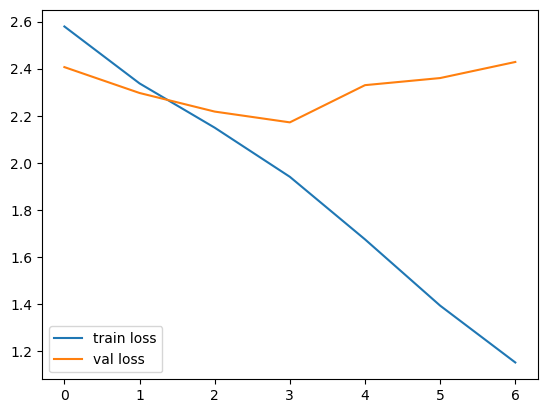

In [16]:
# loss
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

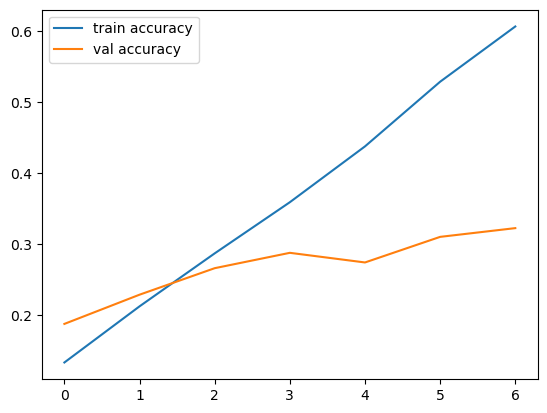

In [18]:
# Accuracy
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()

In [19]:
model.save("Updated2_HAR.h5")

C:\Users\pk boss\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
